<a href="https://colab.research.google.com/github/Kaif-ansari/Machine-Learning-projects/blob/main/ML_2_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COSINE :# calculating the cosine similarity between vectors, often used in recommendation systems  
WORD CLOUD: which visually represent the frequency of words in a dataset or text.
## New Section

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string



In [ ]:
data = pd.read_csv('/content/jobs.csv')

data.head(10)

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
5,5,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",System Analyst
6,6,"2,00,000 - 3,00,000 PA.",0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,"Sales , Retail , Business Development","Real Estate, Property",Sales Executive/Officer
7,7,Not Disclosed by Recruiter,9 - 14 yrs,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Architect
8,8,Not Disclosed by Recruiter,2 - 7 yrs,Bde,Institutional Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
9,9,Not Disclosed by Recruiter,1 - 5 yrs,technical support| support services| applicat...,Voice,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(Technical)


In [ ]:
data = data.drop("Unnamed: 0",axis=1)

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Job Salary,0
Job Experience Required,0
Key Skills,0
Role Category,0
Functional Area,0
Industry,0
Job Title,0


In [ ]:


from wordcloud import WordCloud

# Sample text for word cloud generation
data = "This is a sample text. The word cloud will generate a cloud of words based on this text."

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)

# Get word frequencies
word_frequencies = wordcloud.words_

# Display the words with their frequencies in serial number format
print("Serial No. | Word       | Frequency")
print("-------------------------------------")
for idx, (word, freq) in enumerate(word_frequencies.items(), start=1):
    print(f"{idx:<11}| {word:<10} | {freq:.2f}")



Serial No. | Word       | Frequency
-------------------------------------
1          | text       | 1.00
2          | word       | 1.00
3          | cloud      | 1.00
4          | sample     | 0.50
5          | will       | 0.50
6          | generate   | 0.50
7          | based      | 0.50


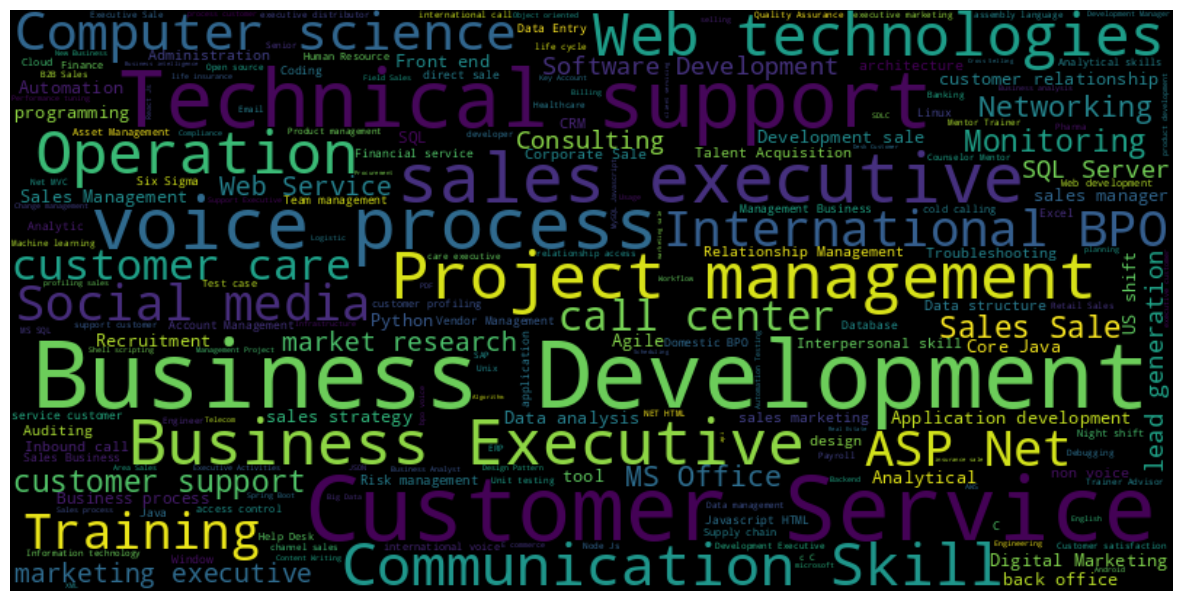

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file name
data = pd.read_csv("/content/jobs.csv")

# Ensure "Key Skills" exists and is not empty
if "Key Skills" in data.columns:
    # Join all the "Key Skills" into a single text string
    text = " ".join(str(skill) for skill in data["Key Skills"].dropna())

    # Define stopwords
    stopwords = set(STOPWORDS)

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords,
                          background_color="black",
                          width=800, height=400).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("The dataset does not contain a 'Key Skills' column.")



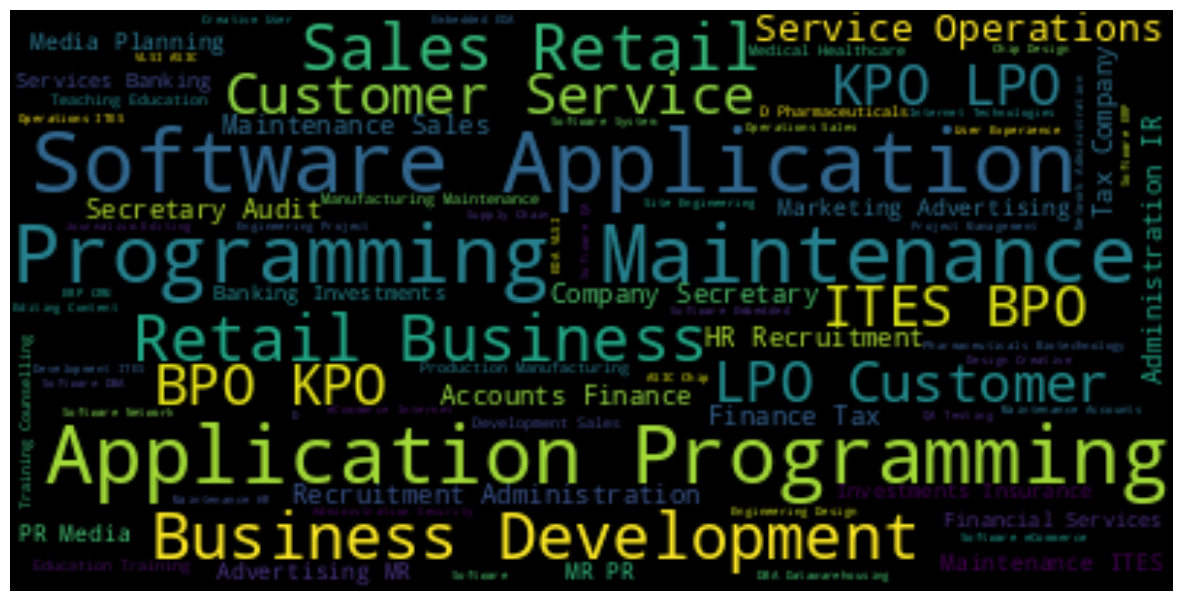

In [ ]:
text = " ".join(str(i) for i in data["Functional Area"]) # Convert each item to a string before joining
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')  #Bilinear interpolation is a resampling technique that computes the value of a pixel based on a weighted
plt.axis("off")
plt.show()

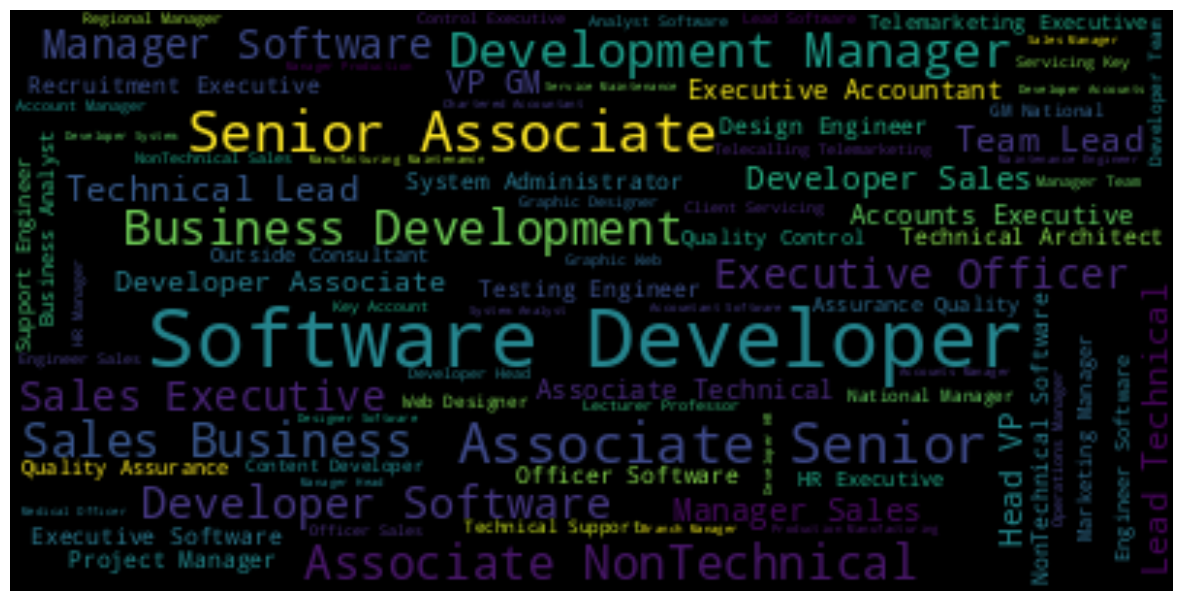

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


text = " ".join(str(i) for i in data["Job Title"])  # Convert each item to string before joining
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')  #Bilinear interpolation is a resampling technique that computes the value of a pixel based on a weight
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

feature = data["Key Skills"].fillna("").astype(str).tolist()

# Initialize the TfidfVectorizer (correct usage)
tfidf = TfidfVectorizer(stop_words="english")

# Transform the 'Key Skills' data into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(feature)

# Compute cosine similarity between the rows of the TF-IDF matrix
similarity = cosine_similarity(tfidf_matrix)

print(similarity)  # Display the similarity matrix


[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.03346209 0.        ]
 [0.         0.         1.         ... 0.         0.02080848 0.01744164]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.03346209 0.02080848 ... 0.         1.         0.        ]
 [0.         0.         0.01744164 ... 0.         0.         1.        ]]


In [ ]:
# Reset the index of the DataFrame to default integer index
data = data.reset_index()

# Create the indices Series using the new integer index and Job Title
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [ ]:
def jobs_recommendation(Title, similarity=similarity):
    # Retrieve the index of the given job title
    index = indices[Title]

    # Calculate similarity scores
    similarity_scores = list(enumerate(similarity[index]))

    # Sort by the similarity score (x[1]) in descending order
    similarity_scores = sorted(similarity_scores)  # Use x[1] directly

    # Select top 5 similar jobs (excluding the first if it’s the same job)
    similarity_scores = similarity_scores[1:6]  # Skip the first (it’s the same job)

    # Get indices of the recommended jobs
    newsindices = [i[0] for i in similarity_scores]

    # Select and return relevant columns for the recommended jobs
    recommendations = data[['Job Title', 'Job Experience Required', 'Key Skills']].iloc[newsindices]

    # Format output for clean display
    recommendations.columns = ['Job Title', 'Experience Required', 'Required Skills']
    return recommendations.reset_index(drop=True)  # Reset index for clean output

# Print recommendations for "Software Developer"
recommendations = jobs_recommendation("Software Developer")
print(recommendations.to_string(index=False))


                 Job Title Experience Required                                                                                                                                                          Required Skills
   Sales Executive/Officer           2 - 5 yrs                                       pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology
             R&D Executive           0 - 1 yrs  Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive
Technical Support Engineer           0 - 5 yrs                                                                                                                                                        Technical Support
          Testing Engineer           2 - 5 yrs                                                                                          

In [ ]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required',
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  
